 ## Cleaning and EDA of (Best Books)

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

Load the appropriate libraries

In [272]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd0      False         False  False     False       False  False       False  False         False  False
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

SyntaxError: invalid syntax (<ipython-input-272-91b33f3ef247>, line 4)

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

Lets read the csv file with custom column descriptions specified in the problem statement.

In [ ]:
df=pd.read_csv("/kaggle/input/goodreads/goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype',
                      'author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

#Examine the first couple of rows of the dataframe
####### 
df.head(2)
####### 

In [273]:
# genres = df['genre_urls']
# genres = []
# for item in genres: 
#     df['genre_urls'] = df['genre_urls'].replace({'/':''}, regex=True)
    
#     genre = item.split("genres")
#     genres.append(genre)
#     print(genres[0])

    
    

> ### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [274]:
#Start by check the column data types
####### 
columns = df.columns
print(columns)
####### 

Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name', 'author', 'genres'], dtype='object')


There are a couple more quick sanity checks to perform on the dataframe. 

In [275]:
#Come up with a few other important properties of the dataframe to check
####### 
df.shape

####### 

(5496, 12)

dataframe datatypes

In [276]:
df.dtypes

rating           int64
review_count     int64
isbn            object
booktype        object
author_url      object
year             int64
genre_urls      object
dir             object
rating_count     int64
name            object
author          object
genres          object
dtype: object

Was the data read correctly and values represented as we expected?

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [277]:
#Get a sense of how many missing values there are in the dataframe.
####### 
df.isnull().sum()

####### 

rating          0
review_count    0
isbn            0
booktype        0
author_url      0
year            0
genre_urls      0
dir             0
rating_count    0
name            0
author          0
genres          0
dtype: int64

In [278]:
df.isna().sum

<bound method DataFrame.sum of       rating  review_count   isbn  booktype  author_url   year  genre_urls    dir  rating_count   name  author  genres
0      False         False  False     False       False  False       False  False         False  False   False   False
1      False         False  False     False       False  False       False  False         False  False   False   False
2      False         False  False     False       False  False       False  False         False  False   False   False
3      False         False  False     False       False  False       False  False         False  False   False   False
4      False         False  False     False       False  False       False  False         False  False   False   False
...      ...           ...    ...       ...         ...    ...         ...    ...           ...    ...     ...     ...
5994   False         False  False     False       False  False       False  False         False  False   False   False
5995   False     

In [279]:
#Try to locate where the missing values occur
####### 
columns_contains_na_values = df.columns[df.isna().any()].tolist()
columns_contains_na_values
####### 

[]

In [280]:
columns_contains_null_values = df.columns[df.isnull().any()].tolist()
columns_contains_null_values

[]

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [281]:
df1 = df.dropna()

In [282]:
df = df1

In [283]:
df.isna().sum

<bound method DataFrame.sum of       rating  review_count   isbn  booktype  author_url   year  genre_urls    dir  rating_count   name  author  genres
0      False         False  False     False       False  False       False  False         False  False   False   False
1      False         False  False     False       False  False       False  False         False  False   False   False
2      False         False  False     False       False  False       False  False         False  False   False   False
3      False         False  False     False       False  False       False  False         False  False   False   False
4      False         False  False     False       False  False       False  False         False  False   False   False
...      ...           ...    ...       ...         ...    ...         ...    ...           ...    ...     ...     ...
5994   False         False  False     False       False  False       False  False         False  False   False   False
5995   False     

Ok so we have done some cleaning. Is it enough? 

In [284]:
#Check the column data types again
####### 
df.dtypes
####### 

rating           int64
review_count     int64
isbn            object
booktype        object
author_url      object
year             int64
genre_urls      object
dir             object
rating_count     int64
name            object
author          object
genres          object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [285]:
#Convert rating_count, review_count and year to int 
#######
df["rating_count"]=df["rating_count"].astype(int)
df["review_count"]=df["review_count"].astype(int)
df["year"]=df["year"].astype(int)
df["rating"]=df["rating"].astype(int)

Final check

[](http://)Some of the other colums that should be strings have NaN. 

In [286]:
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.
[5 min]

<ul>
    <li>What is the highest and least rated genre?</li>
    <li>is there a relationship between rate and author, if yes how author affect the book rate?</li>
    <li>is there a relationship between rate and book seasons</li>
    <li>which books get higher reviews, books with high rate or with low</li>
    <li>if we compare opinions in reviews with rate, will thery be matched, what is best to take</li>
    <li>how book price affects the rate</li>
    <li>which stores sells the most</li>
    <li> is there a relationshio between store and rate</li>
    <li>how many people currently reading, finished,want to read this book</li> 
    <li>which books filmed as movies, and does that affect the rate</li>      
</ul>


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [287]:
#Get the first author_url
test_string = df.author_url[0]
test_string

'Suzanne_Collins'

In [288]:
#Test out some string operations to isolate the author name
####### 
authors =[]
authors_df = df['author_url']
for author_url in authors_df:
    text = author_url.split('.')
    length = len(text)
    authors.append(text[length-1])
df['author_url'] = authors
print(df['author_url'])
    
####### 

0       Suzanne_Collins
1           J_K_Rowling
2       Stephenie_Meyer
3            Harper_Lee
4           Jane_Austen
             ...       
5994       Robert_Alter
5995    Candice_Millard
5996          Jenny_Han
5997       Kate_Avelynn
5999      R_A_Salvatore
Name: author_url, Length: 5496, dtype: object


In [289]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
def get_author(author_url):
    text = author_url.split('.')
    length = len(text)
    name= (text[length-1])
    return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.author[0:5]

0    Suzanne_Collins
1        J_K_Rowling
2    Stephenie_Meyer
3         Harper_Lee
4        Jane_Austen
Name: author, dtype: object

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [318]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
def split_and_join_genres(url):
   #Start by check the column data types
####### 
    genre = url.split('/genres/')

#     for genre in text:
#         genre= genre.replace("|"," ")
# #         print(genre)

    return genre

df['genres']=df.genre_urls.map(split_and_join_genres)
df['genres']

0       [, young-adult|, science-fiction|, dystopia|, ...
1       [, fantasy|, young-adult|, fiction|, fantasy|,...
2       [, young-adult|, fantasy|, romance|, paranorma...
3       [, classics|, fiction|, historical-fiction|, a...
4       [, classics|, fiction|, romance|, historical-f...
                              ...                        
5994    [, poetry|, religion|, christian|, religion|, ...
5995    [, history|, non-fiction|, biography|, adventu...
5996    [, young-adult|, realistic-fiction|, romance|,...
5997    [, contemporary|, romance|, young-adult|, soci...
5999    [, fiction|, fantasy|, magic|, science-fiction...
Name: genres, Length: 5496, dtype: object

---

## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

In [291]:
df.head(5)

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
0,4,136455,0439023483,good_reads:book,Suzanne_Collins,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,"[, young-adult|, science-fiction|, dystopia|, ..."
1,4,16648,0439358078,good_reads:book,J_K_Rowling,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,"[, fantasy|, young-adult|, fiction|, fantasy|,..."
2,3,85746,0316015849,good_reads:book,Stephenie_Meyer,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,"[, young-adult|, fantasy|, romance|, paranorma..."
3,4,47906,0061120081,good_reads:book,Harper_Lee,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,"[, classics|, fiction|, historical-fiction|, a..."
4,4,34772,0679783261,good_reads:book,Jane_Austen,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,"[, classics|, fiction|, romance|, historical-f..."


Choose some columns to generate histograms.

If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize.

**Histograms before adjustments **

Text(0.5, 1.0, 'Rating per Frequency')

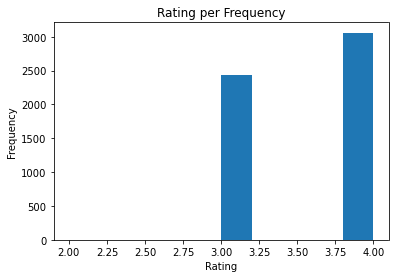

In [292]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)
plt.hist(df.rating.values, bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating per Frequency')


Text(0.5, 1.0, 'Rating per Frequency')

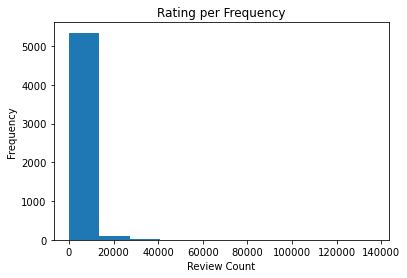

In [293]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)
plt.hist(df.review_count.values, bins=10)
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Rating per Frequency')

Histograms After Adjustments


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

For example, we can determine the "best book" by year! Determine the best books in each year.

In [294]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
for year, subset in df.groupby('year'):
    
    #Find the best book of the year
    ####### 
    book_df = df.name.iloc[year]
    print(book_df)
    ####### 

I, Lucifer
Beelzebub's Tales to His Grandson
The Covenant
The Mirror of Her Dreams
Ada
Caught
The Sandman
A Course in Astral Travel and Dreams
The Varieties of Religious Experience
Riddle-Master (Riddle-Master, #1-3)
Bloodsucking Fiends (A Love Story, #1)
Keep the Aspidistra Flying
Let's Pretend This Never Happened
Daggerspell (Deverry, #1)
The Quantum Thief
The Postman
A Trip to the Stars
The Black Book
Pride and Prejudice
Animal Farm
The Fellowship of the Ring (The Lord of the Rings, #1)
Clockwork Angel (The Infernal Devices, #1)
All Quiet on the Western Front
Insurgent (Divergent, #2)
Last Sacrifice (Vampire Academy, #6)
Marked (House of Night #1)
The Neverending Story
Man's Search for Meaning
Matched (Matched, #1)
An Abundance of Katherines
Halo (Halo, #1)
Naked in Death (In Death, #1)
My Story
Unravel Me (Shatter Me, #2)
A Suitable Boy (A Suitable Boy, #1)
Red Storm Rising
The Gathering Storm (Wheel of Time, #12)
A Scanner Darkly
Eats, Shoots & Leaves
Haroun and the Sea of Stories

Try this for few other definitions of the "best book" using `.groupby`.

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [308]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for item in list1: 
        # check if exists in unique_list or not 
        if item not in unique_list: 
            unique_list.append(item) 
    # print list 
    for item in unique_list: 
        print(item)

In [327]:
#Get the unique genres contained in the dataframe.
####### 
all_genres = []
for genres_list in df.genres: 
    for item in genres_list:
        item = item.replace("|","")
        all_genres.append(item)

unique_genres = unique(all_genres)
unique_genres
    


young-adult
science-fiction
dystopia
fantasy
romance
adventure
book-club
teen
apocalyptic
post-apocalyptic
action
fiction
magic
childrens
science-fiction-fantasy
paranormal
vampires
paranormal-romance
supernatural
urban-fantasy
classics
historical-fiction
academic
school
literature
read-for-school
novels
high-school
european-literature
british-literature
classic-literature
adult
historical-romance
war
military-history
civil-war
christian
religion
picture-books
inspirational
philosophy
juvenile
short-stories
politics
humor
comedy
funny
cultural
japan
contemporary
adult-fiction
mystery
thriller
suspense
mystery-thriller
crime
world-war-ii
holocaust
history
19th-century
plays
drama
france
french-literature
epic-fantasy
epic
high-fantasy
horror
gothic
russia
russian-literature
animals
middle-grade
chapter-books
canada
coming-of-age
spirituality
american
time-travel
fairy-tales
womens-fiction
chick-lit
southern
realistic-fiction
magical-realism
spanish-literature
latin-american
kids
litera

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [333]:
#Add a column for each genre
####### 
df = df.append(pd.DataFrame(genres_list))
df.head()
####### 
# df.shape

,0,author,author_url,booktype,dir,genre_urls,genres,isbn,name,rating,rating_count,review_count,year
0,NaN,Suzanne_Collins,Suzanne_Collins,good_reads:book,dir01/2767052-the-hunger-games.html,/genres/young-adult|/genres/science-fiction|/g...,"[, young-adult|, science-fiction|, dystopia|, ...",0439023483,"The Hunger Games (The Hunger Games, #1)",4.0,2958974.0,136455.0,2008.0
1,NaN,J_K_Rowling,J_K_Rowling,good_reads:book,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,/genres/fantasy|/genres/young-adult|/genres/fi...,"[, fantasy|, young-adult|, fiction|, fantasy|,...",0439358078,Harry Potter and the Order of the Phoenix (Har...,4.0,1284478.0,16648.0,2003.0
2,NaN,Stephenie_Meyer,Stephenie_Meyer,good_reads:book,dir01/41865.Twilight.html,/genres/young-adult|/genres/fantasy|/genres/ro...,"[, young-adult|, fantasy|, romance|, paranorma...",0316015849,"Twilight (Twilight, #1)",3.0,2579564.0,85746.0,2005.0
3,NaN,Harper_Lee,Harper_Lee,good_reads:book,dir01/2657.To_Kill_a_Mockingbird.html,/genres/classics|/genres/fiction|/genres/histo...,"[, classics|, fiction|, historical-fiction|, a...",0061120081,To Kill a Mockingbird,4.0,2078123.0,47906.0,1960.0
4,NaN,Jane_Austen,Jane_Austen,good_reads:book,dir01/1885.Pride_and_Prejudice.html,/genres/classics|/genres/fiction|/genres/roman...,"[, classics|, fiction|, romance|, historical-f...",0679783261,Pride and Prejudice,4.0,1388992.0,34772.0,1813.0


In [335]:
from pandas import DataFrame
df2 = DataFrame (all_genres,columns=unique_genres)
print (df2)

                          0
0                          
1               young-adult
2           science-fiction
3                  dystopia
4                   fantasy
...                     ...
73282    role-playing-games
73283  dungeons-and-dragons
73284           anthologies
73285           collections
73286                  epic

[73287 rows x 1 columns]


Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

In [297]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 

### Part 6.1: What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

There is a category called Paranormal Romance!!!!!

Extras

The following in noticed in the dataset which indicates if this book has seasons or not, this may help in answering such assumption 
Books with seasons get higher rates and views

In [337]:

# for name in df['genres']:
#     if (name.):
#         df[name]= True
#     else:
#           df[name] = False
# print(df['has_seasons'])

1    [, fantasy|, young-adult|, fiction|, fantasy|,...
1                                                  NaN
1                                                  NaN
1                                                  NaN
1                                                  NaN
1                                                  NaN
Name: genres, dtype: object

In [298]:
# df['has_seasons']= df['name']

# for name in df['has_seasons']:
#     if (name.find('#') != -1):
#         df[name]= True
#     else:
#           df[name] = False 
# print(df['has_seasons'])